<a href="https://colab.research.google.com/github/iqra-creator/DEN/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

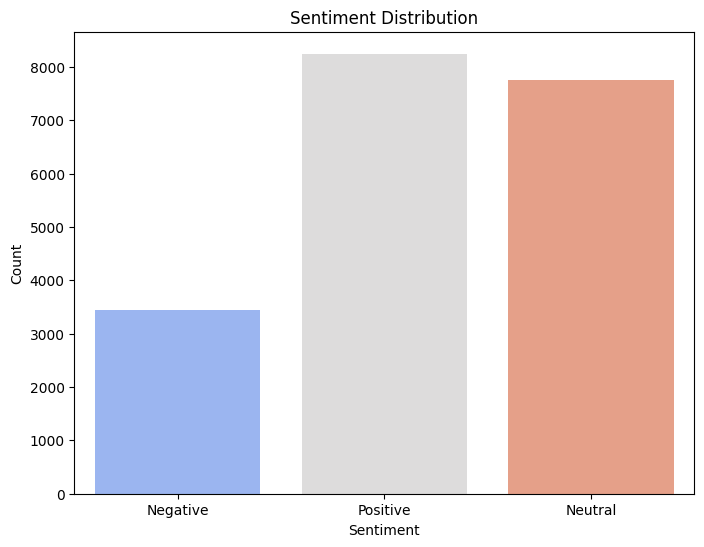

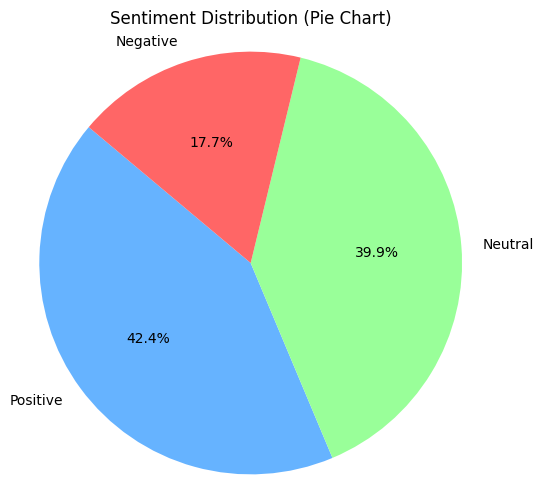

<Figure size 1000x600 with 0 Axes>

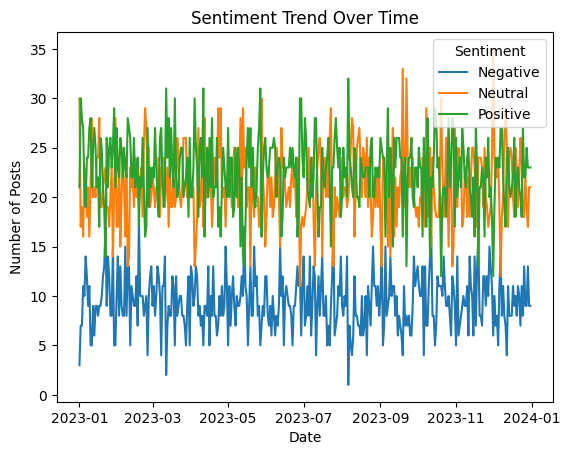

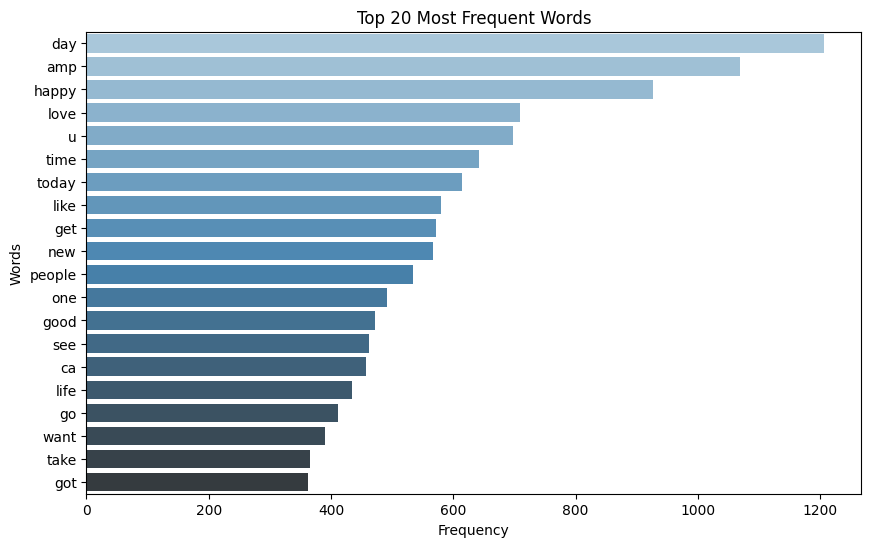

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import nltk
import warnings
import os
from contextlib import redirect_stdout

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Suppress NLTK download messages
nltk_data_dir = '/root/nltk_data'  # Adjust this path as necessary
if not os.path.exists(nltk_data_dir):
    os.makedirs(nltk_data_dir)

with open(os.devnull, 'w') as f, redirect_stdout(f):
    nltk.download('vader_lexicon', quiet=True, download_dir=nltk_data_dir)
    nltk.download('punkt', quiet=True, download_dir=nltk_data_dir)
    nltk.download('stopwords', quiet=True, download_dir=nltk_data_dir)

# Load dataset
file_path = '/content/twitter.csv'
df = pd.read_csv(file_path)

# Text preprocessing
def preprocess_text(text):
    text = re.sub(r'http\S+|@\S+|#\S+', '', text)  # Remove URLs, mentions, hashtags
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]

df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

# Sentiment analysis
sia = SentimentIntensityAnalyzer()
def get_sentiment(text):
    score = sia.polarity_scores(' '.join(text))
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    return 'Neutral'

df['Sentiment'] = df['Cleaned_Text'].apply(get_sentiment)

# Visualization
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 6))
sentiment_counts = df['Sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#99ff99', '#ff6666'])
plt.title('Sentiment Distribution (Pie Chart)')
plt.axis('equal')
plt.show()

# Time-series plot if 'Date' exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date']).dt.date
    sentiment_trend = df.groupby(['Date', 'Sentiment']).size().unstack(fill_value=0)

    plt.figure(figsize=(10, 6))
    sentiment_trend.plot(kind='line')
    plt.title('Sentiment Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Posts')
    plt.show()

# Most frequent words
all_words = [word for tokens in df['Cleaned_Text'] for word in tokens]
most_common_words = Counter(all_words).most_common(20)
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='Blues_d')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()
